# Comparing Classifiers

**Overview**: Goal is to compare the performance of the classifiers namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

The dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<h2>The business goal is to find a model that can explain success of a contact, i.e. if the client subscribes a term deposit. Such model can increase campaign efficiency by identifying 
the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and 
affordable set of potential buying customers. </h2>

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import warnings

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score,roc_auc_score, recall_score, accuracy_score,f1_score, ConfusionMatrixDisplay,classification_report
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from collections import Counter

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import auc as skl_auc


from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")

In [5]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
#Checking for NAN values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<h3>Converting the Categorical and Binary datatypes</h3>

In [9]:
#Convert the target varible to integer type
df['y'].astype('string')

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: string

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
X = df.drop('y', axis=1)  # Using all features except the target
y = df['y']

In [12]:
#Mapping the target feature 'y'
target_map = {'yes': 1, 'no': 0}

In [13]:
y = y.map(target_map)

In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [15]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [16]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [17]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [18]:
df.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [19]:
df.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [20]:
df.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [21]:
df.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [22]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [23]:
df.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [24]:
df.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [25]:
#'job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'

In [26]:
#Transforming the categorical features
oe = OrdinalEncoder(categories = [['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student']])
X['job_coder'] = oe.fit_transform(X[['job']])

In [27]:
oe = OrdinalEncoder(categories = [['married', 'single', 'divorced', 'unknown']])
X['marital_coder'] = oe.fit_transform(X[['marital']])

In [28]:
oe = OrdinalEncoder(categories = [['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate']])
X['education_coder'] = oe.fit_transform(X[['education']])

In [29]:
oe = OrdinalEncoder(categories = [['no', 'unknown', 'yes']])
X['default_coder'] = oe.fit_transform(X[['default']])

In [30]:
oe = OrdinalEncoder(categories = [['no', 'unknown', 'yes']])
X['housing_coder'] = oe.fit_transform(X[['housing']])

In [31]:
oe = OrdinalEncoder(categories = [['no', 'unknown', 'yes']])
X['loan_coder'] = oe.fit_transform(X[['loan']])

In [32]:
oe = OrdinalEncoder(categories = [['telephone', 'cellular']])
X['contact_coder'] = oe.fit_transform(X[['contact']])

In [33]:
oe = OrdinalEncoder(categories = [['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep']])
X['month_coder'] = oe.fit_transform(X[['month']])

In [34]:
oe = OrdinalEncoder(categories = [['mon', 'tue', 'wed', 'thu', 'fri']])
X['day_of_week_coder'] = oe.fit_transform(X[['day_of_week']])

In [35]:
oe = OrdinalEncoder(categories = [['nonexistent', 'failure', 'success']])
X['poutcome_coder'] = oe.fit_transform(X[['poutcome']])

In [36]:
X.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_coder,marital_coder,education_coder,default_coder,housing_coder,loan_coder,contact_coder,month_coder,day_of_week_coder,poutcome_coder
23393,56,retired,divorced,university.degree,unknown,no,no,cellular,aug,wed,...,5.0,2.0,6.0,1.0,0.0,0.0,1.0,3.0,2.0,0.0
35871,18,student,single,high.school,no,no,no,cellular,may,fri,...,11.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
1962,43,services,divorced,basic.9y,no,yes,no,telephone,may,fri,...,1.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
12849,30,admin.,single,high.school,no,yes,no,cellular,jul,tue,...,2.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0
36220,45,services,married,high.school,no,yes,yes,cellular,may,thu,...,1.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,3.0,0.0
1951,31,admin.,married,university.degree,unknown,no,no,telephone,may,fri,...,2.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0
33707,27,self-employed,married,basic.9y,no,yes,no,cellular,may,wed,...,8.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0
26258,35,blue-collar,single,basic.6y,no,no,no,cellular,nov,thu,...,3.0,1.0,2.0,0.0,0.0,0.0,1.0,5.0,3.0,1.0
3327,36,services,single,basic.6y,unknown,yes,no,telephone,may,thu,...,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0
32668,34,technician,married,professional.course,no,yes,no,cellular,may,mon,...,4.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0


In [37]:
X = X.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'], axis=1)
X.sample(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_coder,marital_coder,education_coder,default_coder,housing_coder,loan_coder,contact_coder,month_coder,day_of_week_coder,poutcome_coder
5619,58,543,2,999,0,1.1,93.994,-36.4,4.857,5191.0,2.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2613,47,133,12,999,0,1.1,93.994,-36.4,4.856,5191.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2543,56,43,2,999,0,1.1,93.994,-36.4,4.856,5191.0,7.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0
25255,46,135,2,999,0,-0.1,93.200,-42.0,4.153,5195.8,4.0,0.0,4.0,0.0,2.0,0.0,1.0,5.0,1.0,0.0
28298,37,281,1,5,1,-1.8,93.075,-47.1,1.445,5099.1,3.0,0.0,0.0,0.0,2.0,0.0,1.0,8.0,2.0,2.0
16554,50,58,2,999,0,1.4,93.918,-42.7,4.963,5228.1,0.0,0.0,5.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0
17659,46,488,4,999,0,1.4,93.918,-42.7,4.962,5228.1,6.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
10476,36,214,8,999,0,1.4,94.465,-41.8,4.961,5228.1,3.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0
38240,42,138,1,999,0,-3.4,92.431,-26.9,0.743,5017.5,6.0,1.0,6.0,0.0,2.0,0.0,1.0,4.0,0.0,0.0
2668,51,438,2,999,0,1.1,93.994,-36.4,4.859,5191.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0


<h3>EDA</h3> 

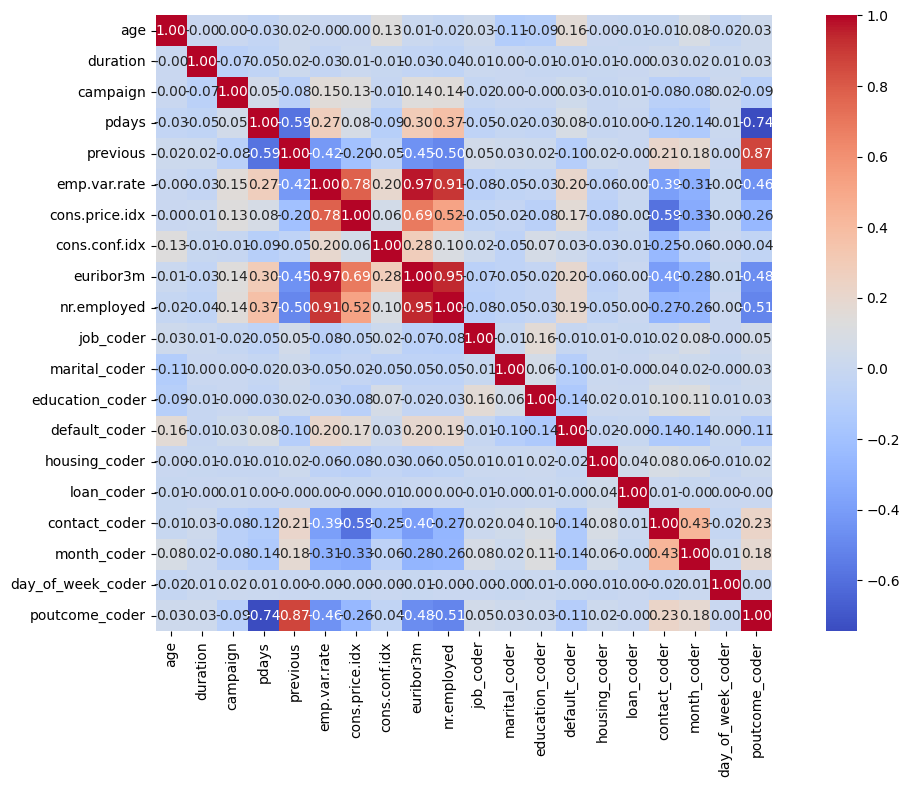

In [38]:
# Correlation matrix and heatmap
correlation = X.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.savefig('images/heap_map.png')

In [39]:
#examine Correlations :
highest_corr = X.corr()[['age']].nlargest(columns = 'age', n = 2).index[1]
print(highest_corr)

default_coder


<h4> Based on the correlation matrix we see that duration, campaign,emp.var.rate, cons.price.idx, housing_coder,loan_coder,contact_coder features are very less correlated when compared to other features so i will drop them from the further analysis.</h4> 

In [40]:
X= X.drop(['duration','campaign','emp.var.rate','cons.price.idx','housing_coder','loan_coder','contact_coder'], axis=1)
X.sample(10)

,age,pdays,previous,cons.conf.idx,euribor3m,nr.employed,job_coder,marital_coder,education_coder,default_coder,month_coder,day_of_week_coder,poutcome_coder
7042,24,999,0,-36.4,4.860,5191.0,11.0,0.0,6.0,0.0,0.0,3.0,0.0
28904,25,999,0,-47.1,1.405,5099.1,4.0,1.0,6.0,0.0,8.0,4.0,0.0
33388,29,999,1,-46.2,1.291,5099.1,3.0,0.0,1.0,0.0,0.0,1.0,1.0
4067,37,999,0,-36.4,4.858,5191.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19934,38,999,0,-36.1,4.966,5228.1,4.0,1.0,4.0,0.0,3.0,4.0,0.0
7545,33,999,0,-36.4,4.864,5191.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0
38658,37,999,2,-30.1,0.719,5017.5,10.0,2.0,1.0,0.0,5.0,2.0,1.0
21410,44,999,0,-36.1,4.963,5228.1,3.0,0.0,3.0,1.0,3.0,1.0,0.0
15880,32,999,0,-42.7,4.960,5228.1,4.0,1.0,1.0,0.0,2.0,0.0,0.0
16917,48,999,0,-42.7,4.962,5228.1,2.0,0.0,1.0,0.0,2.0,3.0,0.0


# " I have dropped the duration feature for initial round of analysis and will be considered in the Problem 11"

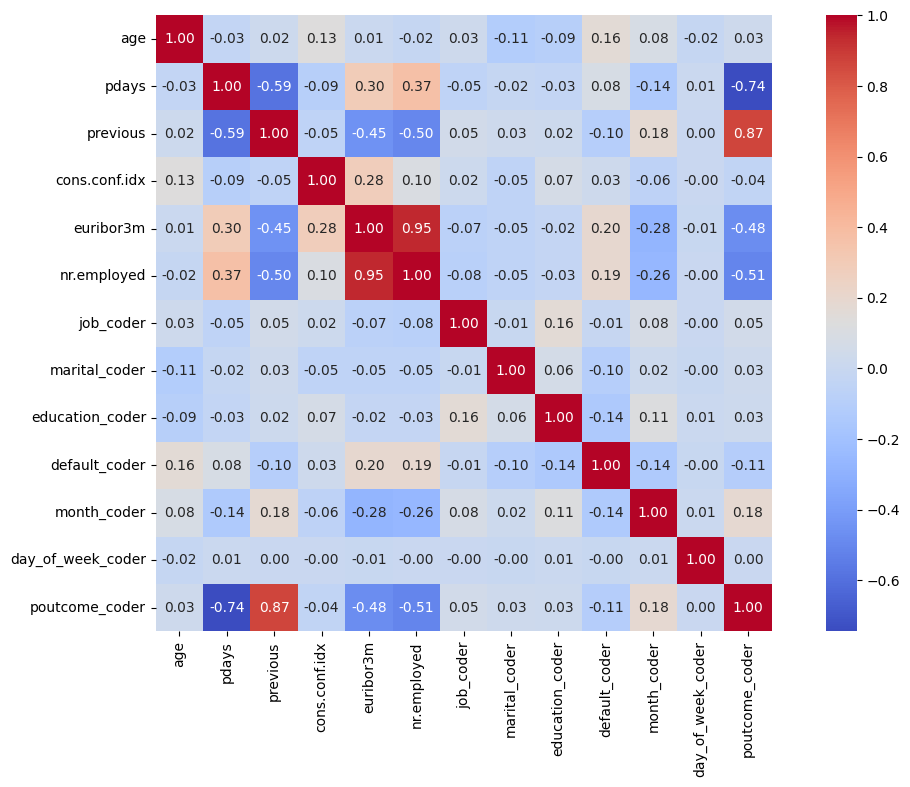

In [41]:
# Correlation matrix and heatmap after dropping the features
correlation = X.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.savefig('images/heap_map1.png')

<h4>Further I observe there are features which are negatively correlated hence can be dropped as well </h4>

In [42]:
X = X.drop(['pdays','nr.employed','marital_coder','education_coder','day_of_week_coder'], axis=1)
X.sample(10)

,age,previous,cons.conf.idx,euribor3m,job_coder,default_coder,month_coder,poutcome_coder
29189,45,0,-47.1,1.405,1.0,0.0,8.0,0.0
7942,38,0,-41.8,4.865,3.0,1.0,1.0,0.0
38430,71,2,-26.9,0.733,6.0,0.0,4.0,1.0
24440,34,0,-42.0,4.191,3.0,0.0,5.0,0.0
15412,32,0,-42.7,4.957,2.0,0.0,2.0,0.0
4330,40,0,-36.4,4.856,2.0,0.0,0.0,0.0
6784,35,0,-36.4,4.857,2.0,0.0,0.0,0.0
22486,47,0,-36.1,4.964,1.0,1.0,3.0,0.0
19681,55,0,-36.1,4.968,5.0,0.0,3.0,0.0
17409,57,0,-42.7,4.962,8.0,1.0,2.0,0.0


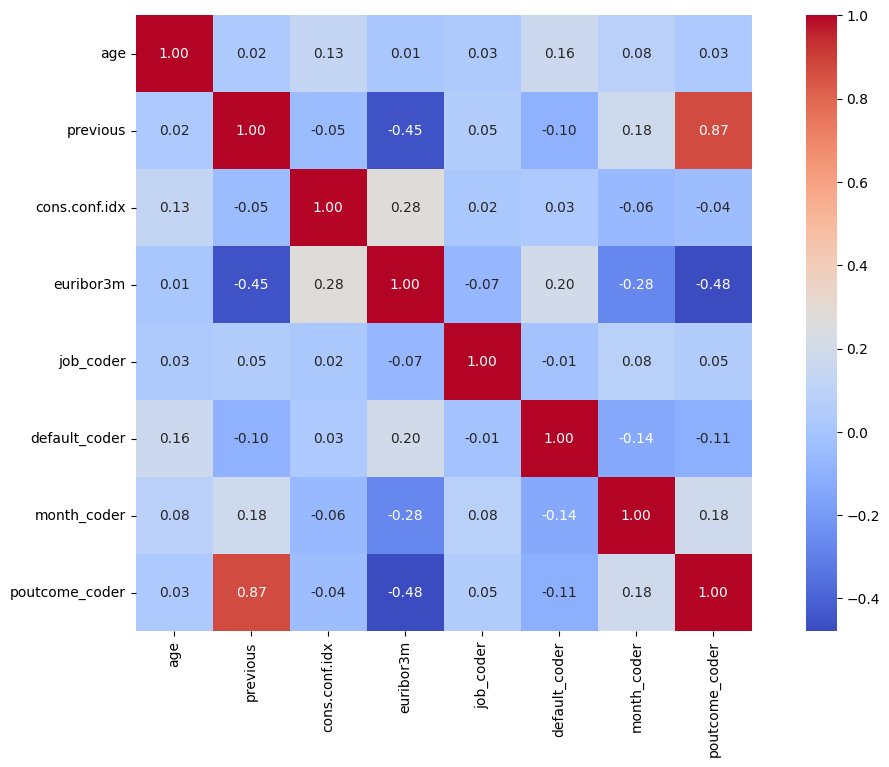

In [43]:
# Correlation matrix and heatmap after dropping the features
correlation = X.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.savefig('images/heap_map2.png')

In [44]:
#examine Correlations :
highest_corr = X.corr()[['age']].nlargest(columns = 'age', n = 2).index[1]
print(highest_corr)

default_coder


In [45]:
#examine Correlations :
highest_corr = X.corr()[['default_coder']].nlargest(columns = 'default_coder', n = 2).index[1]
print(highest_corr)

euribor3m


In [46]:
#examine Correlations :
highest_corr = X.corr()[['cons.conf.idx']].nlargest(columns = 'cons.conf.idx', n = 2).index[1]
print(highest_corr)

euribor3m


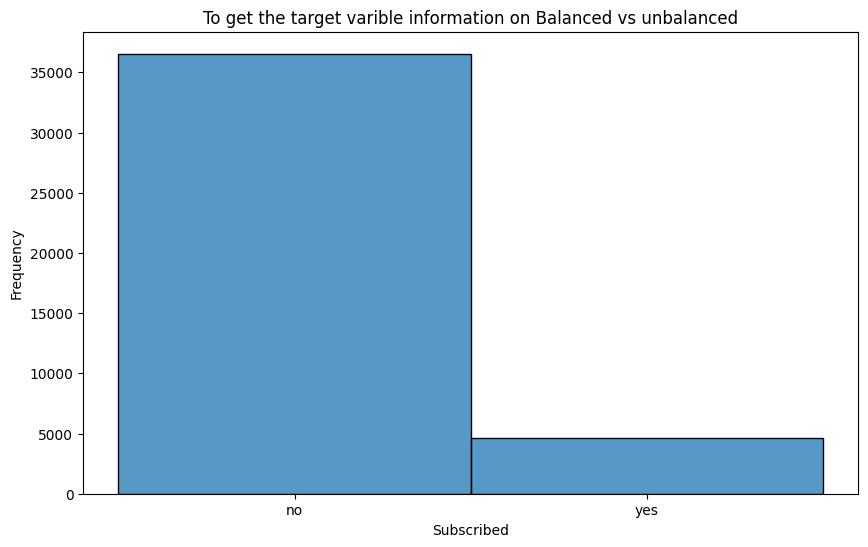

<Figure size 640x480 with 0 Axes>

In [47]:
#visualize the classifiers of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['y'])
plt.title('To get the target varible information on Balanced vs unbalanced')
plt.xlabel('Subscribed')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/balancedvsunbalnced.png')

In [48]:
#To get the counts on yes and no so get an understanding weather the dataset is balanced or unbalanced.
y.value_counts(normalize = True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

<Axes: xlabel='euribor3m', ylabel='default_coder'>

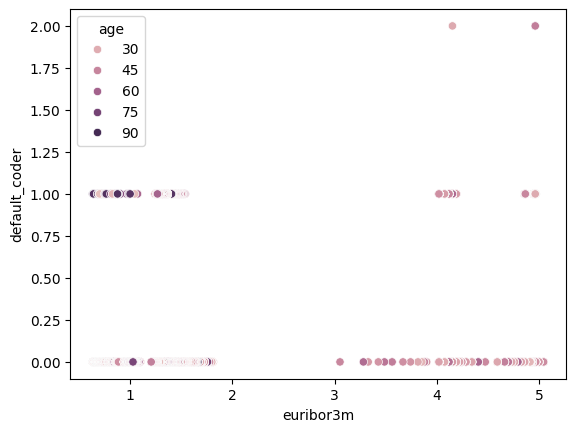

In [49]:
#visualize data with a scatter plot on the highest correlated features.
sns.scatterplot(data = X, x = 'euribor3m', y = 'default_coder', hue = 'age')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [51]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(scaler.mean_)
print('----------')
print(scaler.scale_)

[ 40.04438186   0.1748082  -40.49005536   3.61737555   3.69350296
   0.21287754   2.22695931   0.17199184]
----------
[10.34033241  0.50262448  4.62323873  1.73460528  2.43526851  0.40957896
  2.43562541  0.46058625]


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

<h4> The baseline score for the classifier by using the DummyClassifier with the training data. Score estimator on the test set. 

Note: The DummyClassifier works just as all other estimators you have encountered and has a .fit and .score method. </h4>

In [117]:
dummy_clf = DummyClassifier().fit(X_train_scaled, y_train)
baseline_score = dummy_clf.score(X_test_scaled, y_test)

print(baseline_score)

0.8880256385354958


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [120]:
logreg = LogisticRegression().fit(X_train_scaled, y_train)

In [122]:
#checking the positive proba
positive_probs = logreg.predict_proba(X_test)[: ,1]

print(positive_probs.shape) 

(10297,)


C:\Users\pooja\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [124]:
#feature importance evaluation :
r = permutation_importance(logreg, X_test_scaled, y_test, random_state = 123)
r.importances_mean

array([-0.00031077, -0.00077693, -0.00118481,  0.00231135, -0.00060212,
       -0.00019423, -0.00044673,  0.00471982])

In [126]:
X.columns

Index(['age', 'previous', 'cons.conf.idx', 'euribor3m', 'job_coder',
       'default_coder', 'month_coder', 'poutcome_coder'],
      dtype='object')

In [128]:
for i in zip(X.columns, r.importances_mean):
    print(i)

('age', -0.00031077012722151575)
('previous', -0.0007769253180537561)
('cons.conf.idx', -0.0011848111100320358)
('euribor3m', 0.002311352821210111)
('job_coder', -0.0006021171214916742)
('default_coder', -0.0001942313295133946)
('month_coder', -0.0004467320578809053)
('poutcome_coder', 0.004719821307176897)


In [130]:
# Getting training score and testing for comparison
lr_pipe = Pipeline([('lr', LogisticRegression())])
lr_pipe.fit(X_train_scaled, y_train)
lr_pipe_acc_test = lr_pipe.score(X_test_scaled, y_test)
lr_pipe_acc_training = lr_pipe.score(X_train_scaled, y_train)

print(f'Train_Score: {lr_pipe_acc_training: .2f}\nTest_Score: {lr_pipe_acc_test: .2f}')

Train_Score:  0.89
Test_Score:  0.89


### Problem 9: Score the Model

What is the accuracy of your model?

In [133]:
#Different Metrics
preds = logreg.predict(X_test_scaled)
accuracy = accuracy_score(preds, y_test)
precision = precision_score(preds, y_test)
recall = recall_score(preds, y_test)
f1 = f1_score(preds, y_test)

print(f'Accuracy: {accuracy: .2f}\nPrecision: {precision: .2f}\nRecall: {recall: .2f}\nF1_Score: {f1: .2f}')

Accuracy:  0.89
Precision:  0.12
Recall:  0.59
F1_Score:  0.19


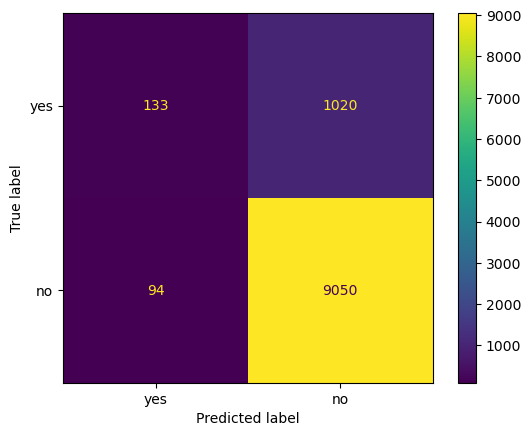

<class 'numpy.ndarray'>


In [135]:
#Confusion Matrix 
banking_confusion_mat = confusion_matrix(y_test, preds, labels = [1, 0])
dist = ConfusionMatrixDisplay(confusion_matrix=banking_confusion_mat, display_labels=['yes', 'no'])
dist.plot()
plt.show()

# Answer check
print(type(banking_confusion_mat))

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

<h3> Some analysis on different models with different performance metrics for default parameters </h3>

In [139]:
#SMOTE Generate and plot a synthetic imbalanced classification dataset
oversample = SMOTE()
X_smote,y_smote = oversample.fit_resample(X,y)
print(Counter(y_smote))

Counter({0: 36548, 1: 36548})


In [141]:
model = DecisionTreeClassifier()
score = cross_val_score(model, X_smote,y_smote, scoring = 'f1', n_jobs = -1, cv = 3)
print("Score with SMOTE:")
print(score.mean())

Score with SMOTE:
0.6247430494172347


In [143]:
# KNN 
knn_pipe = Pipeline([('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train_scaled, y_train)
knn_predict = knn_pipe.predict(X_test_scaled)
pre_score = precision_score(y_test, knn_predict)
recall = recall_score(y_test, knn_predict)
acc_score = accuracy_score(y_test, knn_predict)
f1_log = f1_score(y_test,knn_predict)
roc_auc_log = roc_auc_score(y_test,knn_predict)

print(f'KNN_Accuracy: {acc_score: .2f}\nKNN_Precision: {pre_score: .2f}\nKNN_F1_score: {f1_log: .2f}\nKNN_ROC_Curve: {roc_auc_log: .2f}\nKNN_Recall: {recall: .2f}')

KNN_Accuracy:  0.89
KNN_Precision:  0.50
KNN_F1_score:  0.35
KNN_ROC_Curve:  0.62
KNN_Recall:  0.27


In [145]:
# Decision Tree
dtree_pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42))])
dtree_pipe.fit(X_train_scaled, y_train)
dtree_predict = dtree_pipe.predict(X_test_scaled)
dtree_pre_score = precision_score(y_test, dtree_predict)
dtree_recall = recall_score(y_test, dtree_predict)
dtree_acc_score = accuracy_score(y_test, dtree_predict)
dtree_f1_log = f1_score(y_test,dtree_predict)
dtree_roc_auc_log = roc_auc_score(y_test,dtree_predict)
                    
print(f'DTree_Accuracy: {dtree_acc_score: .2f}\nDTree_Precision: {dtree_pre_score: .2f}\nDTree_F1_score: {dtree_f1_log: .2f}\nDTree_ROC_Curve: {dtree_roc_auc_log: .2f}\nDTree_Recall: {dtree_recall: .2f}')

DTree_Accuracy:  0.86
DTree_Precision:  0.35
DTree_F1_score:  0.32
DTree_ROC_Curve:  0.62
DTree_Recall:  0.30


In [147]:
# SVM 
svc_pipe = Pipeline([('svc', SVC(kernel='poly'))])
svc_pipe.fit(X_train_scaled, y_train)
svc_predict = svc_pipe.predict(X_test_scaled)
svc_pre_score = precision_score(y_test, svc_predict)
svc_recall = recall_score(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)
svc_f1_log = f1_score(y_test,svc_predict)
svc_roc_auc_log = roc_auc_score(y_test,svc_predict)
                    
print(f'SVC_Accuracy: {svc_acc_score: .2f}\nSVC_Precision: {svc_pre_score: .2f}\nSVC_F1_score: {svc_f1_log: .2f}\nSVC_ROC_Curve: {svc_roc_auc_log: .2f}\nSVC_Recall: {svc_recall: .2f}')

SVC_Accuracy:  0.90
SVC_Precision:  0.65
SVC_F1_score:  0.30
SVC_ROC_Curve:  0.59
SVC_Recall:  0.20


<h3> Model Comparisons on Train and Test Accuracy </h3>

In [150]:
#KNN
knn_pipe = Pipeline([('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train_scaled, y_train)
knn_pipe_acc_test = knn_pipe.score(X_test_scaled, y_test)
knn_pipe_acc_training = knn_pipe.score(X_train_scaled, y_train)

print(f'Train_Score: {knn_pipe_acc_training: .2f}\nTest_Score: {knn_pipe_acc_test: .2f}')

Train_Score:  0.91
Test_Score:  0.89


In [152]:
#SVM
svc_pipe = Pipeline([('svc', SVC(kernel='poly'))])
svc_pipe.fit(X_train_scaled, y_train)
svc_pipe_acc_test = svc_pipe.score(X_test_scaled, y_test)
svc_pipe_acc_training = svc_pipe.score(X_train_scaled, y_train)

print(f'Train_Score: {svc_pipe_acc_training: .2f}\nTest_Score: {svc_pipe_acc_test: .2f}')

Train_Score:  0.90
Test_Score:  0.90


In [154]:
#Decision Tree
dtree_pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42))])
dtree_pipe.fit(X_train_scaled, y_train)
dtree_pipe_acc_test = dtree_pipe.score(X_test_scaled, y_test)
dtree_pipe_acc_training = dtree_pipe.score(X_train_scaled, y_train)

print(f'Train_Score: {dtree_pipe_acc_training: .2f}\nTest_Score: {dtree_pipe_acc_test: .2f}')

Train_Score:  0.96
Test_Score:  0.86


In [156]:
results_df = ''

res_dict = {'Model': ['KNN', 'Logistic Regression', 'Decision Tree','SVC'],
           'Train Accuracy': [0.91, 0.89, 0.96, 0.90],
           'Test Accuracy': [0.89, 0.89, 0.86, 0.90],
           'Training Time(secs)': [2, 2, 2, 60]}
results_df = pd.DataFrame(res_dict).set_index('Model')

results_df

,Train Accuracy,Test Accuracy,Training Time(secs)
Model,,,
KNN,0.91,0.89,2
Logistic Regression,0.89,0.89,2
Decision Tree,0.96,0.86,2
SVC,0.90,0.90,60


# Explaination of the above comparison
<h3>
    1. Decision Trees training accuracy is good however KNN and Logistic Regression test accuracy is good and faster training time. 
    
    2. When we look at SVC the training and test accuracy are good but training time is highly computational.
</h3>

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

<h3> I would like to do some feature engineering and exploration with features dropped in the initial round of analysis.</h3>

In [52]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
['duration','campaign','emp.var.rate','cons.price.idx','housing_coder','loan_coder','contact_coder']

['duration',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'housing_coder',
 'loan_coder',
 'contact_coder']

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [55]:
X_improved = df.drop('y', axis=1)  # Using all features except the target
y_improved = df['y']

In [56]:
X_improved = X_improved.drop(['pdays','nr.employed','marital','education','day_of_week'], axis=1)
X_improved.sample(10)

,age,job,default,housing,loan,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
7670,36,blue-collar,unknown,no,no,telephone,may,42,11,0,nonexistent,1.1,93.994,-36.4,4.864
7747,31,blue-collar,no,no,no,telephone,may,232,3,0,nonexistent,1.1,93.994,-36.4,4.864
3748,39,self-employed,no,yes,no,telephone,may,291,1,0,nonexistent,1.1,93.994,-36.4,4.859
8517,41,admin.,no,no,no,telephone,jun,129,4,0,nonexistent,1.4,94.465,-41.8,4.864
6962,34,management,no,yes,no,telephone,may,84,1,0,nonexistent,1.1,93.994,-36.4,4.860
16045,33,services,no,yes,no,cellular,jul,714,1,0,nonexistent,1.4,93.918,-42.7,4.961
7799,42,management,no,no,no,telephone,jun,163,1,0,nonexistent,1.4,94.465,-41.8,4.865
25019,29,technician,no,no,yes,cellular,nov,206,2,0,nonexistent,-0.1,93.200,-42.0,4.153
9914,57,blue-collar,unknown,no,no,telephone,jun,651,2,0,nonexistent,1.4,94.465,-41.8,4.959
26992,39,admin.,no,yes,no,telephone,nov,442,4,0,nonexistent,-0.1,93.200,-42.0,4.076


<h3> Reason to drop the above features are they are not highly correlated but this round i did consider some imporant features like duration </h3>

In [57]:
#Mapping the target feature 'y'
target_map = {'yes': 1, 'no': 0}

In [58]:
y_improved = y_improved.map(target_map)
y_improved

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [59]:
#Transforming the categorical features
oe = OrdinalEncoder(categories = [['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student']])
X_improved['job_coder'] = oe.fit_transform(X_improved[['job']])

In [60]:
oe = OrdinalEncoder(categories = [['no', 'unknown', 'yes']])
X_improved['default_coder'] = oe.fit_transform(X_improved[['default']])

In [61]:
oe = OrdinalEncoder(categories = [['no', 'unknown', 'yes']])
X_improved['housing_coder'] = oe.fit_transform(X_improved[['housing']])

In [62]:
oe = OrdinalEncoder(categories = [['no', 'unknown', 'yes']])
X_improved['loan_coder'] = oe.fit_transform(X_improved[['loan']])

In [63]:
oe = OrdinalEncoder(categories = [['telephone', 'cellular']])
X_improved['contact_coder'] = oe.fit_transform(X_improved[['contact']])

In [64]:
oe = OrdinalEncoder(categories = [['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep']])
X_improved['month_coder'] = oe.fit_transform(X_improved[['month']])

In [65]:
oe = OrdinalEncoder(categories = [['nonexistent', 'failure', 'success']])
X_improved['poutcome_coder'] = oe.fit_transform(X_improved[['poutcome']])

In [66]:
X_improved.head()

,age,job,default,housing,loan,contact,month,duration,campaign,previous,...,cons.price.idx,cons.conf.idx,euribor3m,job_coder,default_coder,housing_coder,loan_coder,contact_coder,month_coder,poutcome_coder
0,56,housemaid,no,no,no,telephone,may,261,1,0,...,93.994,-36.4,4.857,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,services,unknown,no,no,telephone,may,149,1,0,...,93.994,-36.4,4.857,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,37,services,no,yes,no,telephone,may,226,1,0,...,93.994,-36.4,4.857,1.0,0.0,2.0,0.0,0.0,0.0,0.0
3,40,admin.,no,no,no,telephone,may,151,1,0,...,93.994,-36.4,4.857,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56,services,no,no,yes,telephone,may,307,1,0,...,93.994,-36.4,4.857,1.0,0.0,0.0,2.0,0.0,0.0,0.0


In [67]:
X_improved = X_improved.drop(['job','default','housing','loan','contact','month','poutcome'], axis=1)
X_improved.sample(10)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_coder,default_coder,housing_coder,loan_coder,contact_coder,month_coder,poutcome_coder
20360,31,75,1,0,1.4,93.444,-36.1,4.966,4.0,0.0,2.0,0.0,1.0,3.0,0.0
21656,32,231,3,0,1.4,93.444,-36.1,4.963,4.0,0.0,2.0,2.0,1.0,3.0,0.0
11622,40,20,18,0,1.4,94.465,-41.8,4.959,8.0,0.0,0.0,0.0,0.0,1.0,0.0
20306,36,444,3,0,1.4,93.444,-36.1,4.965,4.0,0.0,0.0,0.0,1.0,3.0,0.0
36935,36,166,1,0,-2.9,92.963,-40.8,1.099,10.0,0.0,0.0,0.0,1.0,1.0,0.0
8359,29,201,2,0,1.4,94.465,-41.8,4.864,3.0,0.0,2.0,0.0,0.0,1.0,0.0
18695,33,21,14,0,1.4,93.918,-42.7,4.968,3.0,0.0,2.0,0.0,1.0,2.0,0.0
1397,35,102,1,0,1.1,93.994,-36.4,4.855,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10023,40,265,3,0,1.4,94.465,-41.8,4.958,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4242,40,81,1,0,1.1,93.994,-36.4,4.856,2.0,1.0,2.0,0.0,0.0,0.0,0.0


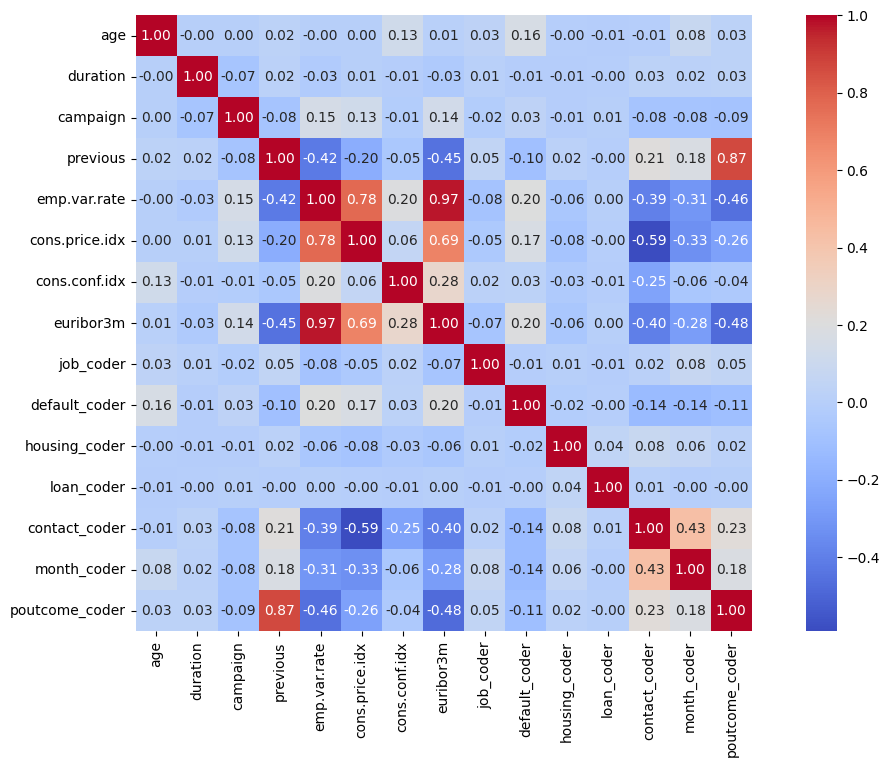

In [68]:
# Correlation matrix and heatmap after dropping the features
correlation = X_improved.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.savefig('images/heap_map3.png')

<h3> Splitting the data and standardization </h3>

In [69]:
# Split the data for new features
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(X_improved, y_improved, test_size = 0.25, random_state = 42)

In [70]:
# Standardization
scaler = StandardScaler()
X_train_scaled_improved = scaler.fit_transform(X_train_improved)
X_test_scaled_improved = scaler.fit_transform(X_test_improved)

print(scaler.mean_)
print('----------')
print(scaler.scale_)

[ 4.00443819e+01  2.60484801e+02  2.56385355e+00  1.74808197e-01
  7.77508012e-02  9.35709885e+01 -4.04900554e+01  3.61737555e+00
  3.69350296e+00  2.12877537e-01  1.06924347e+00  3.25531708e-01
  6.34165291e-01  2.22695931e+00  1.71991842e-01]
----------
[ 10.34033241 258.99069714   2.83559874   0.50262448   1.57159255
   0.57733298   4.62323873   1.73460528   2.43526851   0.40957896
   0.98643954   0.72315292   0.48166345   2.43562541   0.46058625]


<h3> Sample modeling for new features </h3>

In [202]:
# Decision Tree
dtree_pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42))])
dtree_pipe.fit(X_train_scaled_improved, y_train_improved)
dtree_predict = dtree_pipe.predict(X_test_scaled_improved)
dtree_pre_score = precision_score(y_test_improved, dtree_predict)
dtree_recall = recall_score(y_test_improved, dtree_predict)
dtree_acc_score = accuracy_score(y_test_improved, dtree_predict)
dtree_f1_log = f1_score(y_test_improved,dtree_predict)
dtree_roc_auc_log = roc_auc_score(y_test_improved,dtree_predict)

print(f'DTree_Accuracy: {dtree_acc_score: .2f}\nDTree_Precision: {dtree_pre_score: .2f}\nDTree_F1_score: {dtree_f1_log: .2f}\nDTree_ROC_Curve: {dtree_roc_auc_log: .2f}\nDTree_Recall: {dtree_recall: .2f}')

DTree_Accuracy:  0.88
DTree_Precision:  0.48
DTree_F1_score:  0.50
DTree_ROC_Curve:  0.73
DTree_Recall:  0.53


<h3> After adding some features the accuracy of Decision Tree Regression is increased to 0.86 from 0.88 as above </h3>

In [205]:
#Logistic Regression
lr_pipe = Pipeline([ ('lr', LogisticRegression(random_state = 42))])
lr_pipe.fit(X_train_scaled_improved, y_train_improved)
lr_predict = lr_pipe.predict(X_test_scaled_improved)
lr_pre_score = precision_score(y_test_improved, lr_predict)
lr_recall = recall_score(y_test_improved, lr_predict)
lr_acc_score = accuracy_score(y_test_improved, lr_predict)
lr_f1_log = f1_score(y_test_improved,lr_predict)
lr_roc_auc_log = roc_auc_score(y_test_improved,lr_predict)
                    
print(f'LR_Accuracy: {lr_acc_score: .2f}\nLR_Precision: {lr_pre_score: .2f}\nLR_F1_score: {lr_f1_log: .2f}\nLR_ROC_Curve: {lr_roc_auc_log: .2f}\nLR_Recall: {lr_recall: .2f}')

LR_Accuracy:  0.91
LR_Precision:  0.66
LR_F1_score:  0.49
LR_ROC_Curve:  0.68
LR_Recall:  0.39


<h3> After adding some features the accuracy of Logistic Regression is increased to 0.91 from 0.89 as above </h3>

<h3> Trying a new model Naive Bayes with Cumulative gains Curve</h3>

Train_Score:  0.82
Test_Score:  0.82


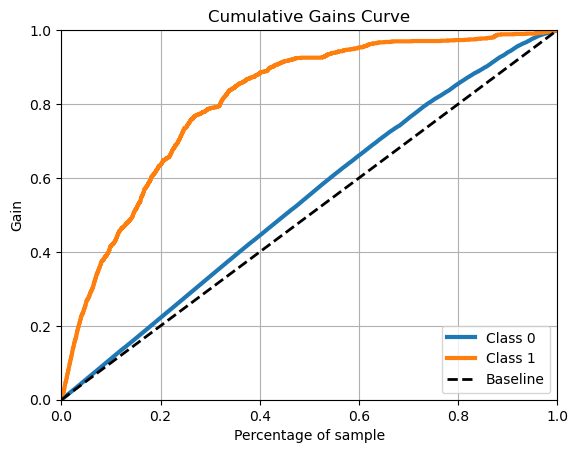

<Figure size 640x480 with 0 Axes>

In [209]:
import scikitplot as skplt

nb_pipe = Pipeline([('nb', GaussianNB())])
nb_pipe.fit(X_train_scaled_improved, y_train_improved)
nb_pipe_acc_test = nb_pipe.score(X_test_scaled_improved, y_test_improved)
nb_pipe_acc_training = nb_pipe.score(X_train_scaled_improved, y_train_improved)
predicted_probas = nb_pipe.predict_proba(X_test_scaled_improved)

print(f'Train_Score: {nb_pipe_acc_training: .2f}\nTest_Score: {nb_pipe_acc_test: .2f}')

# The magic happens here
skplt.metrics.plot_cumulative_gain(y_test_improved, predicted_probas)
plt.show()
plt.savefig('images/Cumulative Gains Curve.png')

<h2> Using Hyperparameters on the different models and evaluating it performance metrics  along with Confusion Matirx and ROC_Curve</h2>

<h5> KNN </h5>

In [213]:
# KNN with 10 Neighbors
knn_pipe_neighbors = Pipeline([('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_pipe_neighbors.fit(X_train_scaled_improved, y_train_improved)
knn_pipe_neighbors_acc_test = knn_pipe_neighbors.score(X_test_scaled_improved,  y_test_improved)
knn_pipe_neighbors_acc_training = knn_pipe_neighbors.score(X_train_scaled_improved, y_train_improved)

print(f'Train_Score: {knn_pipe_neighbors_acc_training: .2f}\nTest_Score: {knn_pipe_neighbors_acc_test: .2f}')

Train_Score:  0.92
Test_Score:  0.90


In [215]:
# KNN with Grid Search
knn_roc_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
knn_roc_grid.fit(X_train_scaled_improved, y_train_improved)
knn_roc_grid_acc_test = knn_roc_grid.score(X_test_scaled_improved,  y_test_improved)
knn_roc_grid_acc_training = knn_roc_grid.score(X_train_scaled_improved, y_train_improved)

print(f'Train_Score: {knn_roc_grid_acc_training: .2f}\nTest_Score: {knn_roc_grid_acc_test: .2f}')
best_k = knn_roc_grid.best_params_['knn__n_neighbors']
print(best_k)

Train_Score:  0.94
Test_Score:  0.92
31


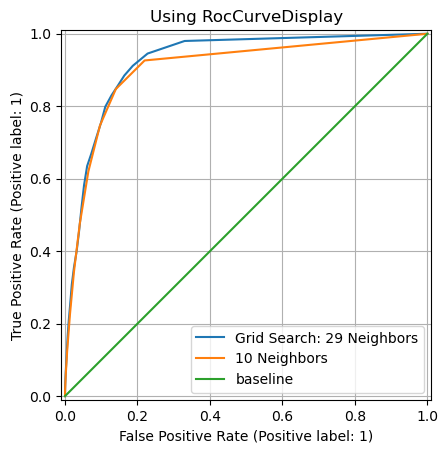

In [217]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(knn_roc_grid, X_test_scaled_improved,  y_test_improved, pos_label = 1, ax = ax, label = 'Grid Search: 29 Neighbors')
RocCurveDisplay.from_estimator(knn_pipe_neighbors, X_test_scaled_improved,  y_test_improved, pos_label = 1, ax = ax, label = '10 Neighbors')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();
plt.savefig('images/roc_curve.png')

<h5> Logictic Regression </h5>

In [84]:
#Logistic Regression different hyperparameters
lr_pipe_params = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', 
                                                                           max_iter = 1000, random_state = 42)
lr_pipe_params.fit(X_train_scaled_improved, y_train_improved)
lr_predict = lr_pipe_params.predict(X_test_scaled_improved)
lr_training_score = lr_pipe_params.score(X_train_scaled_improved, y_train_improved)
lr_test_score = lr_pipe_params.score(X_test_scaled_improved,  y_test_improved)
lr_pre_score = precision_score( y_test_improved, lr_predict)
lr_recall = recall_score( y_test_improved, lr_predict)
lr_acc_score = accuracy_score( y_test_improved, lr_predict)
lr_f1_log = f1_score( y_test_improved,lr_predict)
lr_roc_auc_log = roc_auc_score( y_test_improved,lr_predict)
                    
print(f'LR_Accuracy: {lr_acc_score: .2f}\nLR_Precision: {lr_pre_score: .2f}\nLR_F1_score: {lr_f1_log: .2f}\nLR_ROC_Curve: {lr_roc_auc_log: .2f}\nLR_Recall: {lr_recall: .2f}\nTrain_Score: {lr_training_score: .2f}\nTest_Score: {lr_test_score: .2f}')

LR_Accuracy:  0.91
LR_Precision:  0.66
LR_F1_score:  0.49
LR_ROC_Curve:  0.68
LR_Recall:  0.39
Train_Score:  0.91
Test_Score:  0.91


(234, 703, 0.93)

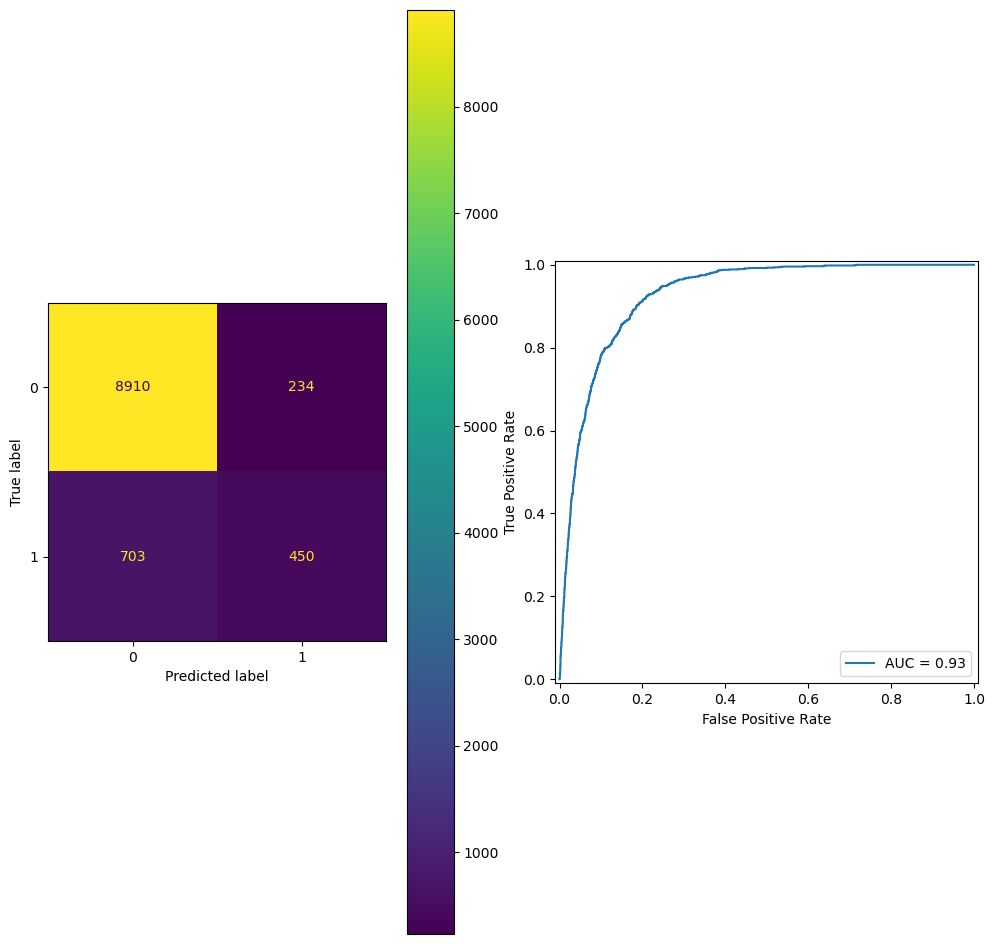

In [222]:
# ROC Curve with Confusion matrix 
from sklearn.metrics import auc as skl_auc

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

preds = lr_pipe_params.predict(X_test_scaled_improved)

# Confusion Matrix
conf_matrix = confusion_matrix( y_test_improved, preds)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = lr_pipe_params.predict_proba(X_test_scaled_improved)[:, 1]
fpr, tpr, thresholds = roc_curve( y_test_improved, y_score, pos_label=1)
roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
disp2.plot(ax=ax[1])
plt.savefig('images/roc_curve1.png')

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(roc_auc_value, 2)

fp, fn, auc

In [224]:
#feature importance evaluation :
r1 = permutation_importance(lr_pipe_params, X_test_scaled_improved, y_test_improved, random_state = 42)
r1.importances_mean

array([-1.55385064e-04,  3.80110712e-02,  1.16538798e-04,  4.07885792e-04,
        3.31552879e-02,  2.32689133e-02,  2.29192969e-03,  0.00000000e+00,
        9.71156648e-05,  6.99232786e-04,  0.00000000e+00,  0.00000000e+00,
        2.60269982e-03,  6.02117121e-04,  7.98290764e-03])

In [226]:
for i in zip(X_improved.columns, r.importances_mean):
    print(i)

('age', -0.00031077012722151575)
('duration', -0.0007769253180537561)
('campaign', -0.0011848111100320358)
('previous', 0.002311352821210111)
('emp.var.rate', -0.0006021171214916742)
('cons.price.idx', -0.0001942313295133946)
('cons.conf.idx', -0.0004467320578809053)
('euribor3m', 0.004719821307176897)


<h5> I did not use the multiclass hyper parameter for this dataset as we are delaying with only 2 class in this dataset.</h5>

<h5> Decision Tree </h5>

In [230]:
# Decision Tree with Hyperparametrs
params = {'max_depth': [1,5,8,10],
         'min_samples_split': [0.1, 0.2, 0.05],
          'criterion': ['gini','entropy'],
          'min_samples_leaf': [1,3,5,7]
         }

In [232]:
dtree = DecisionTreeClassifier()

In [234]:
results = GridSearchCV(dtree, param_grid=params).fit(X_train_scaled_improved, y_train_improved)
best_score = results.best_score_
best_params = results.best_params_
grid_train_acc = results.score(X_train_scaled_improved, y_train_improved)
grid_test_acc = results.score(X_test_scaled_improved,  y_test_improved)
print(f'Best score: {best_score}')
print(f'Best params: {best_params}')
print(f'Training Score: {grid_train_acc}')
print(f'Test Score: {grid_test_acc}')

Best score: 0.9075782586524781
Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 0.05}
Training Score: 0.9082256968048946
Test Score: 0.9115276294066232


<h5> SVM </h5>

In [102]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0],}

In [103]:
svc = SVC()

In [ ]:
grid_svc = GridSearchCV(svc, param_grid=params, cv=5).fit(X_train_scaled_improved, y_train_improved)
grid_train_acc_svc = grid_svc.score(X_train_scaled_improved, y_train_improved)
grid_test_acc_svc = grid_svc.score(X_test_scaled_improved,  y_test_improved)

best_score_svc = results.best_score_
best_params_svc = results.best_params_

print(f'Best score: {best_score_svc}')
print(f'Best params: {best_params_svc}')
print(f'Training Score: {grid_train_acc_svc}')
print(f'Test Score: {grid_test_acc_svc}')

<h3> For the above Grid Search , i could not complete the run it took more than 2 hrs and systems was crashed multiple times </h3>

In [ ]:
#X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
# X_train_scaled_improved, X_test_scaled_improved
# y_train_improved, y_test_improved

<h5> Ensemble Techniques </h5>

<h3> Attempted Random Forest ensemble technique to compare the regular classifiers on the original dataset that include all the features. The tought process behind using this data was to give all the features for modelling and let ramdom forest select ramdomly the imporatnt features for the best accuracy.</h3>

In [71]:
#Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_features='log2')
rf_clf.fit(X_train_scaled, y_train)

rf_train_acc = rf_clf.score(X_train_scaled, y_train)
rf_test_acc = rf_clf.score(X_test_scaled, y_test)

print(f'Training Score: {rf_train_acc}')
print(f'Test Score: {rf_test_acc}')

Training Score: 0.9585639830371305
Test Score: 0.8814217733320384


<h3> As you see the training accuracy is much better than the logistic regression and a average test accuracy </h3>

In [72]:
# Random Forest Perfomance Metrics:
rf_predict = rf_clf.predict(X_test_scaled)

# evaluate the model
report_rf = classification_report(y_test, rf_predict)

print("Classification Report:")
print(report_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      9144
           1       0.45      0.29      0.35      1153

    accuracy                           0.88     10297
   macro avg       0.68      0.62      0.64     10297
weighted avg       0.86      0.88      0.87     10297



<h3> The data used above is unbalanced and i have already created SMOTE data to handle the unbalanced data, i will try that data and use other techniques as below to impove the model accuracy:  

1. Random Forest With Class Weighting - RandomForestClassifier(n_estimators=10, class_weight='balanced')

2. Random Forest With Bootstrap Class Weighting - RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')

3. Random Forest With Random Undersampling - BalancedRandomForestClassifier(n_estimators=10)

4. Easy Ensemble - EasyEnsembleClassifier(n_estimators=10)

</h3>

<h3> Using AdaBoost for classification problem becasue it is an effcetive technique for classifiers. Even the model is predicting at a 89% it is still with its accuracy </h3>

In [73]:
#AdaBoost
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)
ada_clf.fit(X_train_scaled, y_train)

ada_train_acc = ada_clf.score(X_train_scaled, y_train)
ada_test_acc = ada_clf.score(X_test_scaled, y_test)

print(f'Training Score: {ada_train_acc}')
print(f'Test Score: {ada_test_acc}')
#print("AdaBoost Classifier Accuracy:", ada_clf.score(X_train_scaled_resampled, y_train_resampled))

Training Score: 0.8994852869767893
Test Score: 0.8985141303292221


In [74]:
# Adaboost Perfomance Metrics:
ada_predict = ada_clf.predict(X_test_scaled)

# evaluate the model
report_ada = classification_report(y_test, ada_predict)

print("Classification Report:")
print(report_ada)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9144
           1       0.65      0.20      0.31      1153

    accuracy                           0.90     10297
   macro avg       0.78      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



<class 'numpy.ndarray'>


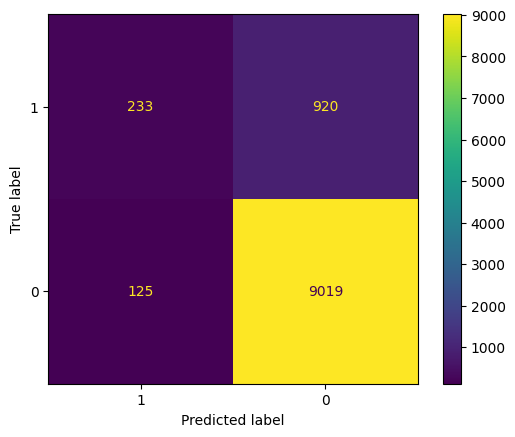

In [75]:
# Confustion Matrix to observe the TP,TN,FP and FN
confusion_mat_ada = confusion_matrix(y_test, ada_predict, labels = [1, 0])
dist = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_ada, display_labels=['1', '0'])
dist.plot()

# Answer check
print(type(confusion_mat_ada))

<h3> As XGBoost uses optimized distributed gradient boosting techinque, attempted to run XGBoost on the initial data </h3>

In [76]:
# XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train_scaled, y_train)

xgb_clf_train_acc = xgb_clf.score(X_train_scaled, y_train)
xgb_clf_test_acc = xgb_clf.score(X_test_scaled, y_test)

print(f'Training Score: {xgb_clf_train_acc}')
print(f'Test Score: {xgb_clf_test_acc}')

C:\Users\pooja\anaconda3\envs\DeepLearning\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:06:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Score: 0.9210773364410346
Test Score: 0.8839467806157133


<h3> Results with Adaboost are more effective for test data when compared to XGBoost hence i will conclude the Adaboost for this problem and go with deployment</h3>

<h3>Testing a simple neural network using Tensorflow to look at the broder prospect on this problem.</h3>

In [77]:
#X_train_scaled, X_test_scaled, y_train, y_test

In [88]:
tf.random.set_seed(42)
neural_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="softmax")
])

tf.random.set_seed(42)
neural_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

np.random.seed(20)
history = neural_model.fit(x = X_train_scaled,
                    y = y_train,validation_data = (X_test_scaled, y_test),
                    epochs=5,
                    batch_size=8)

Epoch 1/5
3862/3862 [==============================] - 24s 6ms/step - loss: 0.3034 - accuracy: 0.1129 - val_loss: 0.2912 - val_accuracy: 0.1120
Epoch 2/5
3862/3862 [==============================] - 25s 6ms/step - loss: 0.2881 - accuracy: 0.1129 - val_loss: 0.2915 - val_accuracy: 0.1120
Epoch 3/5
3862/3862 [==============================] - 25s 7ms/step - loss: 0.2878 - accuracy: 0.1129 - val_loss: 0.2887 - val_accuracy: 0.1120
Epoch 4/5
3862/3862 [==============================] - 23s 6ms/step - loss: 0.2885 - accuracy: 0.1129 - val_loss: 0.2970 - val_accuracy: 0.1120
Epoch 5/5
3862/3862 [==============================] - 21s 5ms/step - loss: 0.2897 - accuracy: 0.1129 - val_loss: 0.2898 - val_accuracy: 0.1120


In [90]:
# Model evaluation
tf.random.set_seed(42)
model_evaluation = neural_model.evaluate(X_train_scaled, y_train)
model_loss = model_evaluation[0]
model_acc = model_evaluation[1]

print(f'Loss: {model_loss}')
print(f'Accuracy: {model_acc}')
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

966/966 [==============================] - 4s 3ms/step - loss: 0.2830 - accuracy: 0.1129
Loss: 0.2830144762992859
Accuracy: 0.11288077384233475
0.11288077384233475
0.11197435855865479


<h3> Feature Importance for AdaBoost </h3>

In [80]:
#feature importance evaluation :
r = permutation_importance(ada_clf, X_test_scaled, y_test, random_state = 42)
r.importances_mean

array([-6.60386520e-04, -1.55385064e-04, -8.74040983e-04,  8.83752549e-03,
       -9.71156648e-05, -4.07885792e-04,  7.57502185e-04,  1.16927260e-02])

In [81]:
for i in zip(X.columns, r.importances_mean):
    print(i)

('age', -0.0006603865203457015)
('previous', -0.0001553850636107468)
('cons.conf.idx', -0.00087404098281052)
('euribor3m', 0.008837525492862031)
('job_coder', -9.71156647566973e-05)
('default_coder', -0.00040788579197823525)
('month_coder', 0.0007575021851024877)
('poutcome_coder', 0.011692726036709723)


| Feature |Recommendation | Coefficient Value | Impact | Interpretation 
| :- | -: | -: | -: | :-: |
| age | <center> Even though the age is not impacted factor we still need to do a proper check on the user age. </center> | -0.00066 | Strong Negative  |Has no impact on the subscribers deposit and inturn campaign success.however it shows a negative value which means the model needs to be improved.
| previous | <center> This feature can still be ipoved as the calls made previously to the campagn can also be followed again to get a success. </center> | 0.00034 | Strong Negative | Has no impact on the depesot subsribers.however it shows a negative value which means the model needs to be improved.
| cons.conf.idx | <center>Consumer confidence index, this is fair feature to consider as it shows the future market and inturn impact the deposit interst rates. </center> | -0.00087 |Significant Positive | Consumer confidence index - monthly indicator is important to a certain extend that can give insights each cosumer personal infomartion.
| euribor3m | <center> No specific recommendation needed based on this feature. </center> | 0.00883 | None | Does not contribe in predicting the deposit subscribers for campign success.
| job_coder | <center> No specific recommendation needed based on this feature. </center> | -9.7115 | None |Does not contribe in predicting the deposit subscribers for campign success.
| default_coder | <center> There is achance having a credit will impact on the crediblity of a consumer </center> | -0.000407 | Strong Negative |Has no impact on the depesot subsribers.however it shows a negative value which means the model needs to be improved.
| month_coder | <center> Follow up to the client every month based on previous months infomration </center> | 0.000757 | Significant Positive | Important to a certain extend that can give insights each cosumer personal infomartion.
| poutcome_coder | <center> Having a previous success campign can give a positive impact on the next steps. </center> | 0.01297 |Significant Positive  | Important to a certain extend that can give insights each cosumer personal infomartion.

<h3> Feature Importance for Logistic Regression with Hyperparameters </h3>

In [85]:
# Get the coefficients and the intercept from the best model Logistic Regression with hyperparameters model
coefficients = lr_pipe_params.coef_
intercept = lr_pipe_params.intercept_

print("Logistic Regression Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)

Logistic Regression Coefficients:
[[-0.00681702  1.1473752  -0.10161092 -0.14935713 -1.39759415  0.82236755
   0.29927874  0.          0.02311374 -0.16189428  0.          0.
   0.39730866  0.17859562  0.30016856]]

Intercept: [-3.00225943]


In [86]:
X_improved.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job_coder',
       'default_coder', 'housing_coder', 'loan_coder', 'contact_coder',
       'month_coder', 'poutcome_coder'],
      dtype='object')

| Feature |Recommendation | Coefficient Value | Impact | Interpretation 
| :- | -: | -: | -: | :-: |
| age | <center> Even though the age is not impacted factor we still need to do a proper check on the user age. </center> | -0.00681702 | Strong Negative  |Has no impact on the subscribers deposit and inturn campaign success.however it shows a negative value which means the model needs to be improved.
| duration | <center> User has to understand all the teram and conditions prior to subscribing a deposit with the help of this phone call.</center> | 1.1473752 | Strong Positive | Is am important factor to have a successful campaign based on the duration of the phone call, if the duration is '0' it is a no.
| campaign | <center> This feature depends on the duration feature and its subscribers. </center>|-0.10161092  | Strong Negative | Has does impact the deposit subscribers a much extend.however it shows a negative value which means the model needs to be improved.
| previous | <center> This feature can still be ipoved as the calls made previously to the campagn can also be followed again to get a success. </center> | -0.14935713 | Strong Negative | Has no impact on the depesot subsribers.however it shows a negative value which means the model needs to be improved.
| emp.var.rate | <center> Employee variable rate has not impact on the deposit subsribers. </center> |-1.39759415 |Strong Negative | Has no impact on the depesot subsribers.however it shows a negative value which means the model needs to be improved.
| cons.price.idx | <center> Consumer price index will impact the interest rates and inturn the deposit subsribers , be careful when we consider this. </center> | 0.82236755| Strong Positive  | Consumer price index - monthly indicator is a strong factor to decide the deposit subscribers.
| cons.conf.idx | <center>Consumer confidence index, this is fair feature to consider as it shows the future market and inturn impact the deposit interst rates. </center> | 0.29927874 |Significant Positive | Consumer confidence index - monthly indicator is important to a certain extend that can give insights each cosumer personal infomartion.
| euribor3m | <center> No specific recommendation needed based on this feature. </center> | 0. | None | Does not contribe in predicting the deposit subscribers for campign success.
| job_coder | <center> No specific recommendation needed based on this feature. </center> | 0.02311374 | None |Does not contribe in predicting the deposit subscribers for campign success.
| default_coder | <center> There is achance having a credit will impact on the crediblity of a consumer </center> | -0.16189428 | Strong Negative |Has no impact on the depesot subsribers.however it shows a negative value which means the model needs to be improved.
| housing_coder | <center> No specific recommendation needed based on this feature. </center> | 0.  | None | Does not contribe in predicting the deposit subscribers for campign success.
| loan_coder | <center>No specific recommendation needed based on this feature.  </center> | 0.  | None | Does not contribe in predicting the deposit subscribers for campign success.
| contact_coder | <center> Yes feature can varying for every user. </center> |0.39730866  | Significant Positive |Important to a certain extend that can give insights each cosumer personal infomartion.
| month_coder | <center> Follow up to the client every month based on previous months infomration </center> | 0.17859562 | Significant Positive | Important to a certain extend that can give insights each cosumer personal infomartion.
| poutcome_coder | <center> Having a previous success campign can give a positive impact on the next steps. </center> | 0.30016856 |Significant Positive  | Important to a certain extend that can give insights each cosumer personal infomartion.